In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras 

In [62]:
# https://rfriend.tistory.com/431
import os # miscellaneous operating system interfaces
import shutil # high-level file operations

base_dir = '/Users/82105/Desktop/bigdata_analysis/data'
img_dir = 'C:/Users/82105/Desktop/bigdata_analysis/data/dogs-vs-cats/test1/test1'
len(os.listdir(img_dir))

12500

In [65]:
os.listdir(img_dir)[:10]

['1.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg']

In [63]:
# 30개 고양이 사진 옮기기
cats30_dir = os.path.join(base_dir,'dog_test')

# 디렉토리만들기
os.mkdir(cats30_dir)

In [64]:
# 이미지 복사 30장만
fnames = ['dog.{}.jpg'.format(i) for i in range(3000)]

for fname in fnames:
    src = os.path.join(img_dir, fname)
    dst = os.path.join(cats30_dir, fname)
    shutil.copyfile(src,dst)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/82105/Desktop/bigdata_analysis/data/dogs-vs-cats/test1/test1\\dog.0.jpg'

In [11]:
# 복사된거 확인
os.listdir(cats30_dir)

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.11.jpg',
 'cat.12.jpg',
 'cat.13.jpg',
 'cat.14.jpg',
 'cat.15.jpg',
 'cat.16.jpg',
 'cat.17.jpg',
 'cat.18.jpg',
 'cat.19.jpg',
 'cat.2.jpg',
 'cat.20.jpg',
 'cat.21.jpg',
 'cat.22.jpg',
 'cat.23.jpg',
 'cat.24.jpg',
 'cat.25.jpg',
 'cat.26.jpg',
 'cat.27.jpg',
 'cat.28.jpg',
 'cat.29.jpg',
 'cat.3.jpg',
 'cat.4.jpg',
 'cat.5.jpg',
 'cat.6.jpg',
 'cat.7.jpg',
 'cat.8.jpg',
 'cat.9.jpg']

In [55]:
# 고양이사진 예제
img_name = 'cat.10.jpg'
img_path = os.path.join(cats30_dir, img_name)


# 이미지 4D 텐서로 전처리
from keras.preprocessing import image

img = image.load_img(img_path, target_size=(128, 128))
img_tensor = image.img_to_array(img)


In [56]:
# 차원추가 3D -> 4D
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor.shape

# scaling into [0, 1]
img_tensor /= 255.


In [57]:
img_tensor[0]

array([[[0.11372549, 0.12941177, 0.16470589],
        [0.03137255, 0.04705882, 0.09019608],
        [0.10196079, 0.11764706, 0.16470589],
        ...,
        [0.5058824 , 0.6392157 , 0.63529414],
        [0.50980395, 0.63529414, 0.62352943],
        [0.49019608, 0.6156863 , 0.6039216 ]],

       [[0.14901961, 0.1764706 , 0.2       ],
        [0.14509805, 0.17254902, 0.20392157],
        [0.16078432, 0.1882353 , 0.22745098],
        ...,
        [0.5058824 , 0.6392157 , 0.63529414],
        [0.5176471 , 0.6431373 , 0.62352943],
        [0.49803922, 0.62352943, 0.6039216 ]],

       [[0.16862746, 0.21176471, 0.21960784],
        [0.19215687, 0.23529412, 0.2509804 ],
        [0.18431373, 0.22745098, 0.2509804 ],
        ...,
        [0.50980395, 0.6431373 , 0.6392157 ],
        [0.5254902 , 0.654902  , 0.627451  ],
        [0.5058824 , 0.63529414, 0.60784316]],

       ...,

       [[0.7137255 , 0.6627451 , 0.49019608],
        [0.6745098 , 0.62352943, 0.45882353],
        [0.6313726 , 0

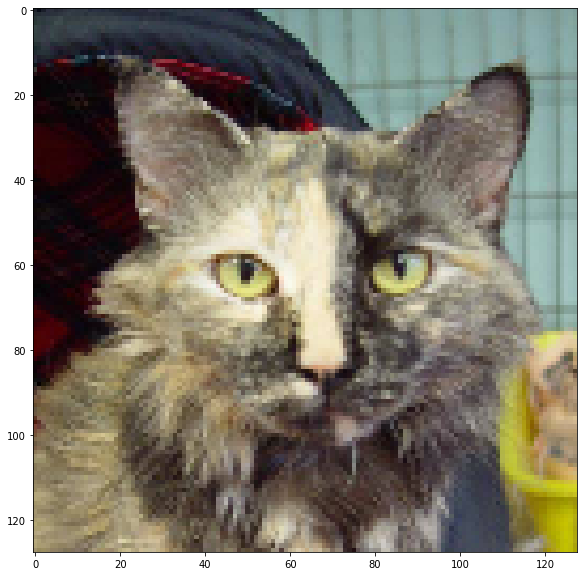

In [58]:
# Image show
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10) # set figure size

plt.imshow(img_tensor[0])
plt.show()

In [47]:
# UDF of pre-processing image into a 4D tensor

def preprocess_img(img_path, target_size=100):

    from keras.preprocessing import image
    img = image.load_img(img_path, target_size=(target_size, target_size))
    img_tensor = image.img_to_array(img)


    # expand a dimension
    img_tensor = np.expand_dims(img_tensor, axis=0)

    # scaling into [0, 1]
    img_tensor /= 255.
    return img_tensor

In [48]:
# layout
n_pic = 30
n_col = 5
n_row = int(np.ceil(n_pic / n_col))

# plot & margin size
target_size = 100
margin = 3

# blank matrix to store results
total = np.zeros((n_row * target_size + (n_row - 1) * margin, n_col * target_size + (n_col - 1) * margin, 3))

# append the image tensors to the 'total matrix'
img_seq = 0
for i in range(n_row):
    for j in range(n_col):
        fname = 'cat.{}.jpg'.format(img_seq)
        img_path = os.path.join(cats30_dir, fname)
        img_tensor = preprocess_img(img_path, target_size)
        horizontal_start = i * target_size + i * margin
        horizontal_end = horizontal_start + target_size
        vertical_start = j * target_size + j * margin
        vertical_end = vertical_start + target_size
        total[horizontal_start : horizontal_end, vertical_start : vertical_end, :] = img_tensor[0]
        img_seq += 1

# display the pictures in grid
plt.figure(figsize=(200, 200))
plt.imshow(total)
plt.show()
